# Test on simulated image

- unCLEANed image

In [1]:
import basc

import astropy
from astropy.table import Table
from astropy.io import fits

# silent Warning, when open image using aplpy
import warnings
from astropy.utils.exceptions import AstropyWarning 
warnings.simplefilter('ignore', category=AstropyWarning)

import matplotlib
import matplotlib.pyplot as plt

import aplpy

basc.readConfig("config.txt")

%matplotlib inline

/scratch/home/rwibowo/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: The mpl_toolkits.axes_grid module was deprecated in version 2.1. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist provies the same functionality instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


# Check the image

In [2]:
image_file = 'AFC-1.alma.afc-1.noisy.image.fits'
psf_file   = 'AFC-1.alma.afc-1.noisy.psf.fits'
flux_file  = 'AFC-1.alma.afc-1.noisy.flux.fits'

In [3]:
fits.info(image_file)

Filename: AFC-1.alma.afc-1.noisy.image.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     116   (750, 750, 1, 1)   float32   


In [4]:
image_data = fits.getdata(image_file)
psf_data = fits.getdata(psf_file)
flux_data = fits.getdata(flux_file)

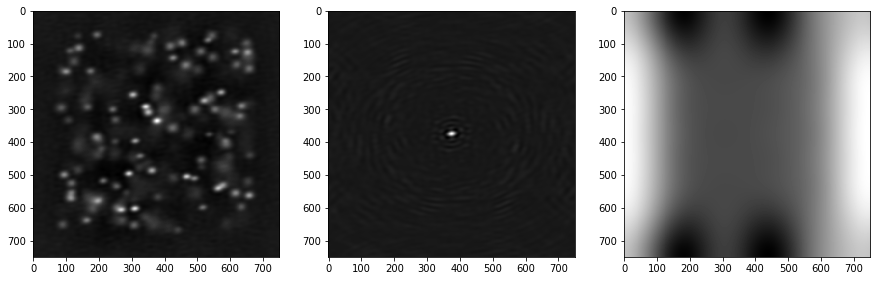

In [5]:
plt.figure(figsize=(15, 5))
plt.subplot(131)
plt.imshow(image_data[0][0], cmap='gray')

plt.subplot(132)
plt.imshow(psf_data[0][0], cmap='gray')

plt.subplot(133)
plt.imshow(flux_data[0][0], cmap='gray')

INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -6.368e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.674e-02 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to -3.132e-02 [aplpy.core]
INFO: Auto-setting vmax to  4.256e-02 [aplpy.core]
INFO: Setting slices=[0, 0] [aplpy.core]
INFO: Auto-setting vmin to  7.344e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.026e+00 [aplpy.core]


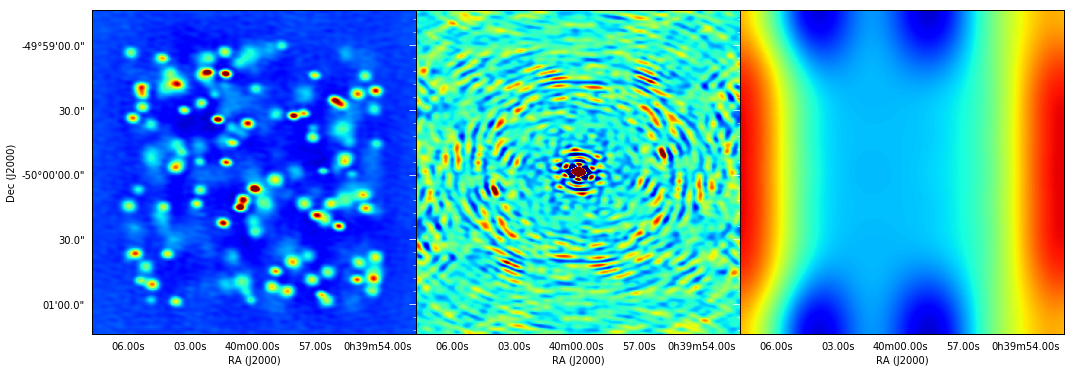

In [6]:
fig = plt.figure(figsize=(15, 5))

image = aplpy.FITSFigure(image_file, figure=fig, subplot=[0.1, 0.1, 0.3, 0.9])
image.show_colorscale()

psf   = aplpy.FITSFigure(psf_file, figure=fig, subplot=[0.4, 0.1, 0.3, 0.9])
psf.show_colorscale()

flux  = aplpy.FITSFigure(flux_file, figure=fig, subplot=[0.7, 0.1, 0.3, 0.9])
flux.show_colorscale()

psf.hide_yaxis_label()
psf.hide_ytick_labels()

flux.hide_yaxis_label()
flux.hide_ytick_labels()

fig.canvas.draw()

In [7]:
image_data.shape
image_data[0][0].shape

(750, 750)

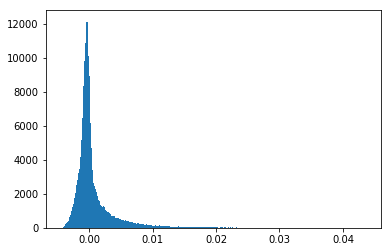

In [8]:
histogram = plt.hist(image_data[0][0].flatten(), 1000)

# Using BASC

In [9]:
# Generate a view objecct to work with
newView = basc.view()

In [10]:
# Load in the fits files
newView.loadMap(image_file)
newView.loadBeam(psf_file)
newView.loadPBCor(flux_file)

In [11]:
# Run the MCMC process
newView.run()
result = newView.getChain()

In [12]:
print("Evidence: {}".format(newView.getEvidence()))
print("RMS residual: {}".format(newView.getRMS()))

result.write("chain.txt", format="ascii", overwrite=True)
print("Models written to chain.txt")

print("Sources detected:")
print(newView.clusters(eps=3)[0])

Evidence: 752.7347489863041
RMS residual: 0.002687333010935156
Models written to chain.txt
Sources detected:
 x   y   dx  dy  F 
--- --- --- --- ---


In [13]:
newView.clusters()

(<Table length=0>
    x       y       dx      dy      F   
 float64 float64 float64 float64 float64
 ------- ------- ------- ------- -------, 68)

In [14]:
result

x,y,F,k,L
float64,float64,float64,int64,float64
182.79135976627003,157.58338737941813,0.017877528336263063,0,1219.8998864554246
151.52337851759512,118.81717033975292,0.017567583868575265,0,1219.8998864554246
167.15187519730534,116.0479901736835,0.020817327379949502,0,1219.8998864554246
280.71307942445856,318.24207612953614,0.04513385551174654,0,1219.8998864554246
235.11385171150323,166.29803473188076,0.00633890746443206,0,1219.8998864554246
332.89527778106276,88.35897654353175,0.03286564269265781,0,1219.8998864554246
345.77040815202054,94.40514880407136,0.016790850736697113,0,1219.8998864554246
117.96930128184613,70.08631054486614,0.03482885155070882,0,1219.8998864554246
60.04669288813602,145.9091878932668,0.008679754093801815,0,1219.8998864554246


In [15]:
newView.getRMS()

0.002687333010935156

In [16]:
newView.getEvidence()

752.7347489863041

In [17]:
newView.resid

array([[ 0.00413202,  0.0033545 ,  0.00268992, ..., -0.00115193,
        -0.00119622, -0.00119132],
       [ 0.00375342,  0.00306232,  0.00247733, ..., -0.00118013,
        -0.00122962, -0.00122964],
       [ 0.00338151,  0.00278574,  0.00228695, ..., -0.00116933,
        -0.00122074, -0.00122358],
       ...,
       [ 0.00280085,  0.00283378,  0.00291881, ..., -0.00370901,
        -0.00375577, -0.00372946],
       [ 0.00322282,  0.00323965,  0.00330671, ..., -0.00353001,
        -0.00352247, -0.00344963],
       [ 0.00375482,  0.00375669,  0.00380562, ..., -0.00307321,
        -0.00302336, -0.00291813]])

In [18]:
newView.resid.shape

(375, 375)